# Feature bias

this occurs when different features are informative for different protected classes


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# %%writefile feature_bias_model1
# we will have a=1 be the disadvantaged group
rho_a = .4 # portion of disadvantaged group 
p_a = [1-rho_a, rho_a]
rho_z = .2 # portion of allocation of target variable
p_z = [1-rho_z, rho_z]
beta = [0, .2] # error rate for each group, 0, x means only error in one group
N = 200 # number of samples
d = 5 # num features
mu = [[1,5,3,6,3],[5,1,1,5,2]] # 5 dim 2 classes for z
d_shared = 3 # indices to keep per protected var value
cov = np.eye(d)

d_noise = d-d_shared # noise dims per row
d_total = d + d_noise # total dims

a = np.random.choice([0,1], p=p_a, size=N)
z = np.random.choice([0,1], p=p_z, size=N)
x_z = [np.random.multivariate_normal(mu[z_i],cov) for z_i in z]
x_n = np.random.multivariate_normal([0]*d_noise,np.eye(d_noise),N)
    # functions for combining noise and true vectors
x_a = {0: lambda x,n: np.concatenate((x,n)), 
      1: lambda x,n: np.concatenate((n, x[d_shared-1:d],  x[:d_noise]))}
x = [x_a[a](x_zi,x_ni) for a,x_zi,x_ni in zip(a,x_z,x_n)]
x = np.asarray(x)


y = z
data = np.asarray([a,z,y]).T
df = pd.DataFrame(data=data, columns = ['a','z','y'])

var_list = []
for i in range(d_total):
    var = 'x' + str(i)
    df[var] = x[:,i]
    var_list.append(var)
    
df.head()


,a,z,y,x0,x1,x2,x3,x4,x5,x6
0,1,0,0,0.133999,-0.630824,3.594510,7.241770,3.816493,2.556906,2.519354
1,1,0,0,0.314686,-0.759111,1.343047,7.712141,3.126454,1.245405,5.616130
2,1,0,0,-0.884686,-1.237395,2.030442,6.465522,3.902055,2.191327,6.418079
3,0,1,1,5.941069,1.313804,-0.592054,4.982602,4.117182,1.887731,0.371537
4,1,1,1,0.195235,0.303347,1.135420,5.458969,1.761033,4.854783,1.271023


In [3]:
df.to_csv('feature_bias_model1.csv')

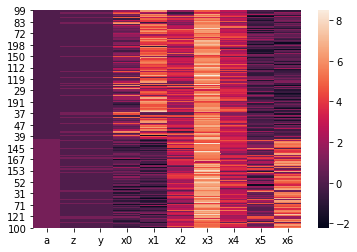

In [4]:
sns.heatmap(df.sort_values('a'))

Then we want to learn to predict $y$ from, for example, $x_0,x_1,x_2,x_3$ 

/home/smb/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


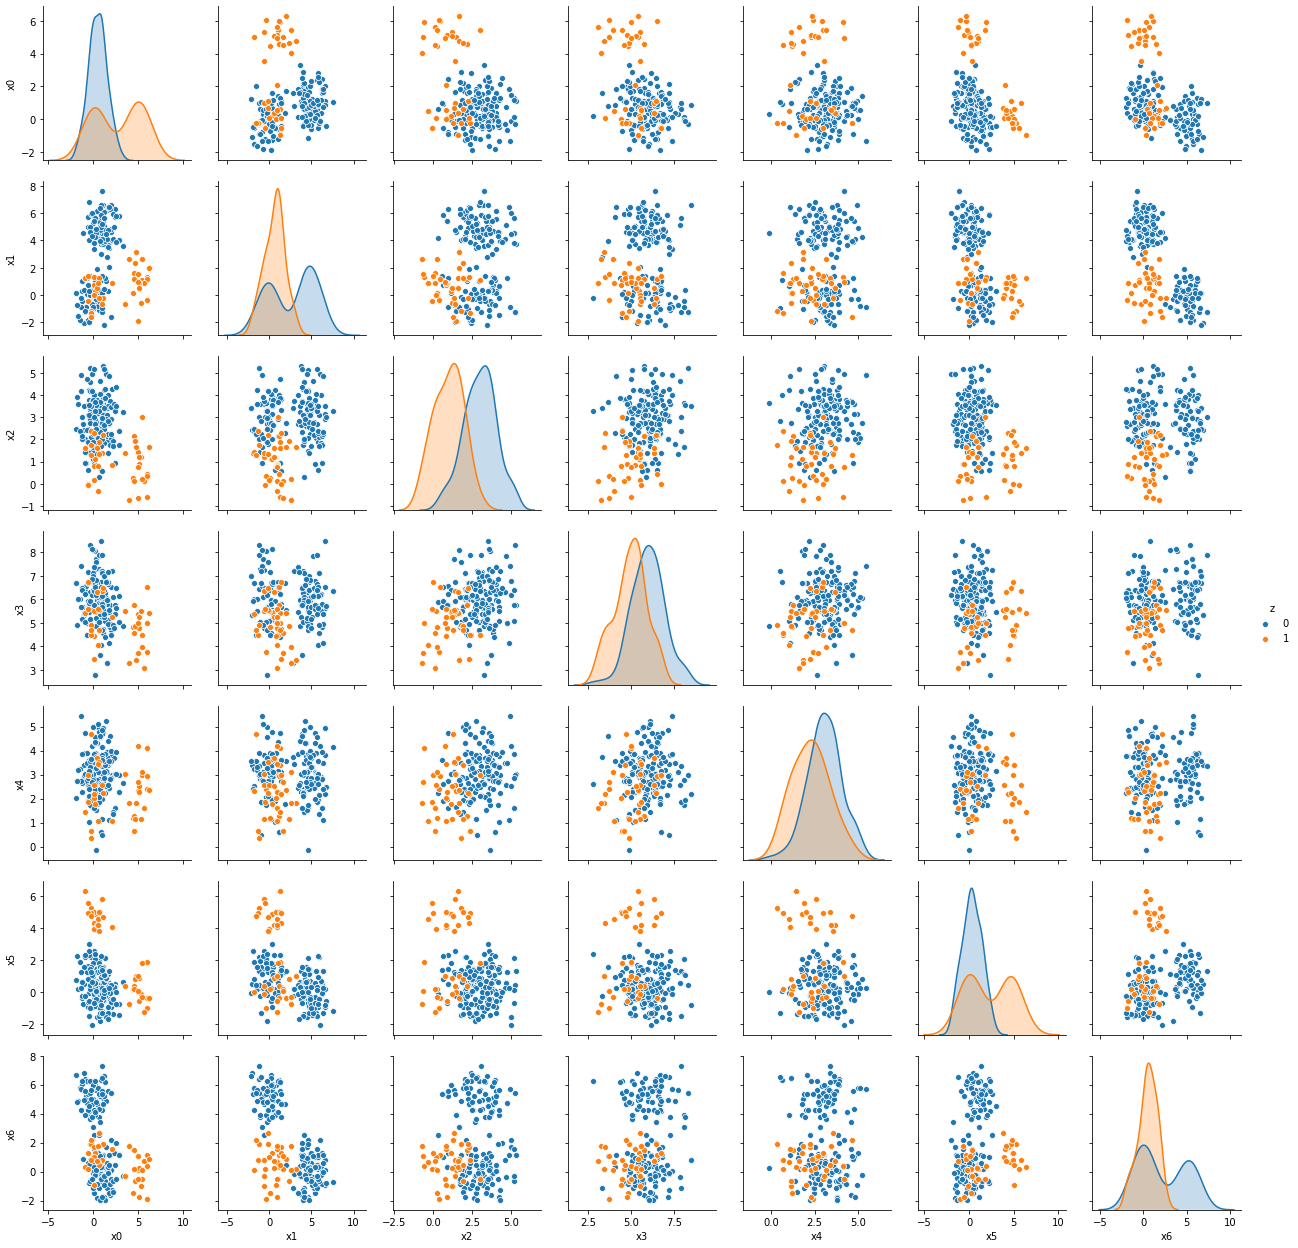

In [5]:
g = sns.pairplot(df, vars= var_list, hue = 'z')